In [1]:
import os
import json

import pandas as pd
#df = pd.DataFrame(columns=['post', 'bound', 'index', 'label', 'pred', 'epsilon', 'p_safe_attack': 1.0, 'd_safe_attack': True, 'p_safe_bounds' , 'd_safe_bounds', 'beps', 'bdelt', 'balpha', 'iterations_attack', 'iterations_bounds', 'veri_time', 'attk_time'])
rows = []
def load(post, bound):
    entries = []
    path = "ExperimentalLogs/%s_%s.log"%(post, bound)
    with open(path) as log_file:
        for line in log_file:
            #print(json.loads(line))
            entries.append(json.loads(line))
            entry = json.loads(line)
            entry['Posterior'] = post
            entry['Bound'] = bound
            entry['Method'] = 'Attack'
            entry['d_safe_bounds'] = abs(entry['d_safe_attack'])
            rows.append(entry)
            entry2 = json.loads(line)
            entry2['Posterior'] = post
            entry2['Bound'] = bound
            entry2['Method'] = 'Cert'
            entry2['d_safe_attack'] = abs(entry2['d_safe_bounds'])
            rows.append(entry2)
    return entries

log_info = load("VOGN", "chernoff")
log_info = load("NA", "chernoff")
log_info = load("SWAG", "chernoff")
log_info = load("BBB", "chernoff")

In [2]:
df = pd.DataFrame.from_dict(rows, orient='columns')
df.head()

,index,label,pred,epsilon,p_safe_attack,d_safe_attack,p_safe_bounds,d_safe_bounds,beps,bdelt,balpha,iterations_attack,iterations_bounds,veri_time,attk_time,Posterior,Bound,Method
0,41,7.0,7.0,0.05,0.933775,True,0.0,1,0.05,0.1,0.05,151.0,151.0,9.969145,365.658077,VOGN,chernoff,Attack
1,41,7.0,7.0,0.05,0.933775,0,0.0,False,0.05,0.1,0.05,151.0,151.0,9.969145,365.658077,VOGN,chernoff,Cert
2,51,3.0,3.0,0.05,1.000000,True,0.0,1,0.05,0.1,0.05,151.0,151.0,9.899563,367.314699,VOGN,chernoff,Attack
3,51,3.0,3.0,0.05,1.000000,0,0.0,False,0.05,0.1,0.05,151.0,151.0,9.899563,367.314699,VOGN,chernoff,Cert
4,21,6.0,6.0,0.05,0.000000,False,0.0,0,0.05,0.1,0.05,151.0,151.0,9.091740,369.528251,VOGN,chernoff,Attack


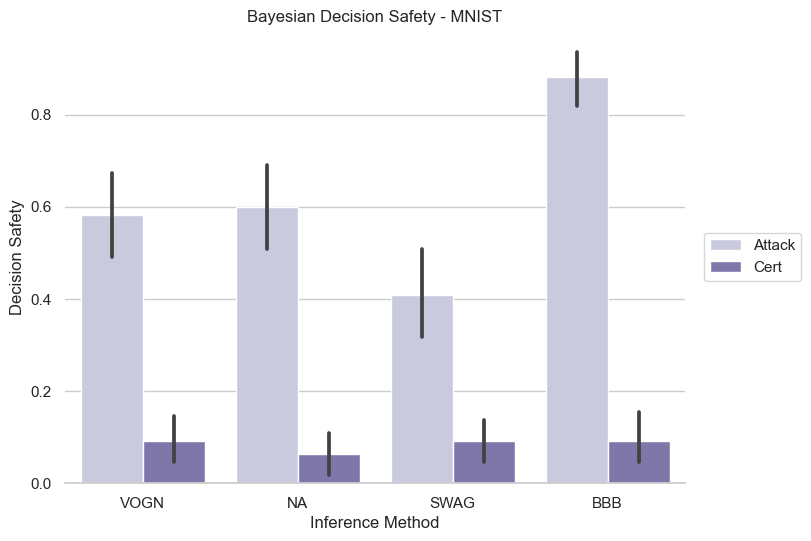

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6), dpi=100)
sns.set_theme(style="whitegrid")

#sns.boxplot(data=df, x="Posterior", y="d_safe_attack", hue="Method",
#                inner="quart", linewidth=1,
#               palette={"Attack": "b", "Cert": ".85"})


sns.barplot(x="Posterior", y="d_safe_attack", hue="Method",
                 data=df, palette="Purples")

plt.title("Bayesian Decision Safety - MNIST")
plt.ylabel("Decision Safety")
plt.xlabel("Inference Method")

sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.2,0.5), loc="center right")
plt.show()